# Práctica: Análise de Datos Temporais con Pandas


Nesta práctica, traballaredes con datos do Instituto Nacional de Estatística (INE) sobre a evolución dos prezos do IPC de diferentes produtos. 

Sobre o dataset:

- Índice: expresa un valor en base 100 (sobre un ano de referencia).
- Variación anual: compara o mes actual co o mesmo mes do ano anterior.
- Variación en lo que va de año: compara o mes actual co mes de xaneiro do mesmo ano.
- Vairación mensual: compara o valor co mes anterior.

## Preparación

- Descarga dos datos: Accede á ligazón proporcionada e descarga os datos en calquer formato compatible con Pandas (XML, CSV, JSON) [https://datos.gob.es/es/catalogo/ea0010587-indices-nacionales-de-clases-ipc-identificador-api-509041](https://datos.gob.es/es/catalogo/ea0010587-indices-nacionales-de-clases-ipc-identificador-api-509041)

- Utiliza un entorno conda que teña instalado ``pandas`` e ``matplotlib``.

## Descrición

1. Utiliza ``pandas`` para cargar os datos nun DataFrame e preparalos para a análise.
    Ten en conta que será necesario preprocesar o dataset para o correcto funcionamiento do DataFrame. Douche unhas pistas: 
    - As datas están organizadas en sentido inverso, é decir aparecen primeiro as datas mais recentes. 
    - Por defecto o valor das datas é un string, deberás formatearlo correctamente para que o DataFrame o identifique en formato ``datetime``.
    - Os valores no campo "Total" separan os valores decimais por ",", para poder facer o casting a float debedes camialos por ".".

2. Determina os 5 produtos que máis incrementaron de prezo no ano 2024. (Usa o tipo de dato "Variación anual")

3. Representa a evolución do valor do tipo de dato "Índice" dos 5 produtos anteriores nunha gráfica. 

4. Determina o ano co máximo valor de incremento medio considerando todos os produtos. (Usa o tipo de dato "Variación anual")


## Entrega

Debedes entregar un script en Python onde se realicen todos os pasos descritos e engadir a gráfica obtenida en formato .png.



In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
df = pd.read_csv("ipc.csv", delimiter="\t")

df["Periodo"] = df["Periodo"].apply(lambda x: datetime.strptime(x, "%YM%M"))
df["Total"] = df["Total"].str.replace(",", ".")
df["Total"] = pd.to_numeric(df["Total"], errors = "coerce").astype(np.float32)

df

,Clases,Tipo de dato,Periodo,Total
0,Índice general,Índice,2025-01-01 00:01:00,116.733002
1,Índice general,Índice,2024-01-01 00:12:00,116.533997
2,Índice general,Índice,2024-01-01 00:11:00,116.010002
3,Índice general,Índice,2024-01-01 00:10:00,115.725998
4,Índice general,Índice,2024-01-01 00:09:00,115.009003
...,...,...,...,...
103039,1270 Otros servicios n.c.o.p.,Variación en lo que va de año,2002-01-01 00:05:00,2.300000
103040,1270 Otros servicios n.c.o.p.,Variación en lo que va de año,2002-01-01 00:04:00,2.200000
103041,1270 Otros servicios n.c.o.p.,Variación en lo que va de año,2002-01-01 00:03:00,2.200000
103042,1270 Otros servicios n.c.o.p.,Variación en lo que va de año,2002-01-01 00:02:00,1.900000


In [ ]:
aux = df[(df["Periodo"].dt.year == 2024) & (df["Tipo de dato"] == 'Variación anual')]

top5 = aux.nlargest(5, "Total")

top5["Periodo"] = top5["Periodo"].dt.year

top5

,Clases,Tipo de dato,Periodo,Total
6103,0115 Aceites y grasas,Variación anual,2024,49.099998
6104,0115 Aceites y grasas,Variación anual,2024,49.099998
6105,0115 Aceites y grasas,Variación anual,2024,46.200001
6102,0115 Aceites y grasas,Variación anual,2024,45.500000
6106,0115 Aceites y grasas,Variación anual,2024,43.200001


<Axes: title={'center': 'AAAAA'}, xlabel='Periodo'>

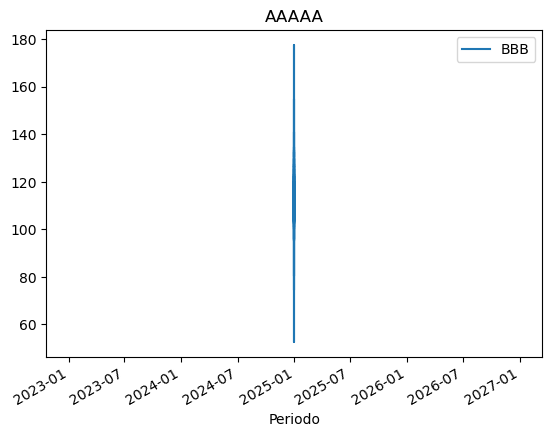

In [ ]:
ejercicio2 = df[df["Tipo de dato"] == "Índice"].drop_duplicates(subset=["Clases"])


ejercicio2.plot(y="Total", x="Periodo", title = "AAAAA", label = "BBB")